In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [63]:
#Importing Required Libraries for the Project
import numpy as np
import pandas as pd 
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Loading the dataset
cardio_vascular_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/cardio_train.csv", delimiter=";")
cardio_vascular_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


# Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


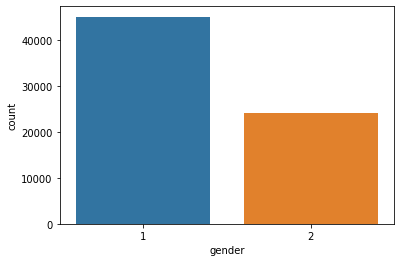

In [4]:
sns.countplot(cardio_vascular_data['gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


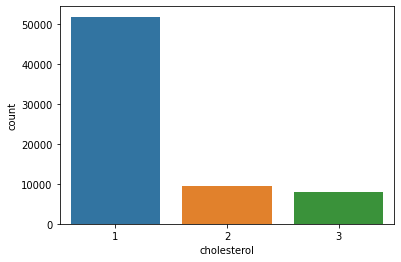

In [5]:
sns.countplot(cardio_vascular_data['cholesterol'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


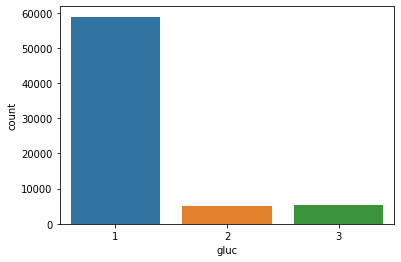

In [6]:
sns.countplot(cardio_vascular_data['gluc'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


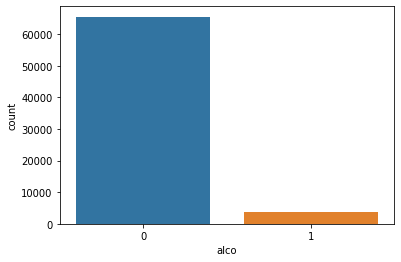

In [7]:
sns.countplot(cardio_vascular_data['alco'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


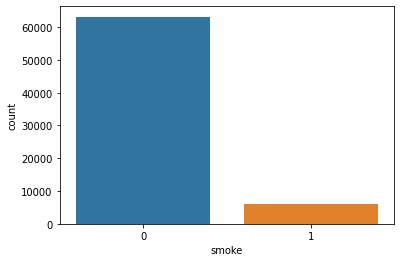

In [8]:
sns.countplot(cardio_vascular_data['smoke'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


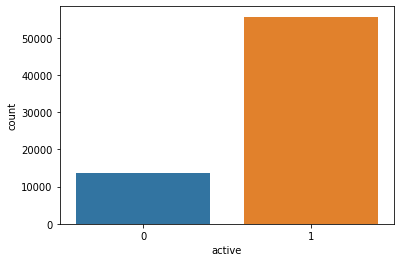

In [9]:
sns.countplot(cardio_vascular_data['active'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


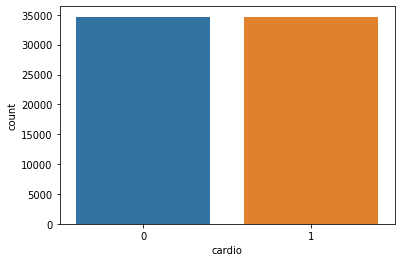

In [10]:
sns.countplot(cardio_vascular_data['cardio'])

# Data Preprocessing

In [11]:
#Checking the datatypes for all the attributes in the dataset
cardio_vascular_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [12]:
#Checking for null values in the dataset
cardio_vascular_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [13]:
#Checking for the starting and ending values to find out the outliers present in the dataset
cardio_vascular_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#Age attribute is in the form of number of days. So, converting age to number of years.
cardio_vascular_data['age'] = cardio_vascular_data['age']/365.25

In [15]:
#Dropping the data entries where ap_hi and ap_lo are out of range.
cardio_vascular_data.drop(cardio_vascular_data.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [16]:
#Displaying the top 5 entries from the datatset to check if the data is preprocessed properly.
cardio_vascular_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.516769,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.104038,1,163,71.0,110,70,1,1,0,0,1,1
2,990,59.961670,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.832991,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.046543,1,155,62.0,120,80,1,1,0,0,1,0


# Correlation Matrix Plot 

### Correlation Matrix Visualization without Values 

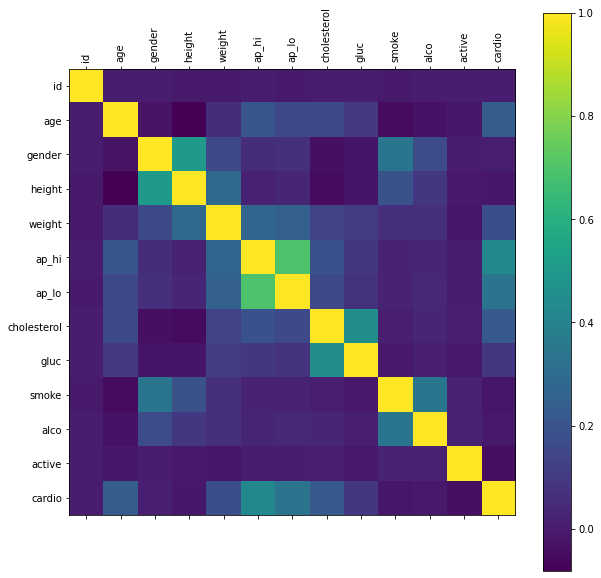

In [17]:
#Correlation matrix for finding out which attributes(features) are correlated.
rcParams['figure.figsize'] = 10,10
plt.matshow(cardio_vascular_data.corr())
plt.yticks(np.arange(cardio_vascular_data.shape[1]), cardio_vascular_data.columns ,rotation='horizontal')
plt.xticks(np.arange(cardio_vascular_data.shape[1]), cardio_vascular_data.columns, rotation='vertical')
plt.colorbar()

### Correlation Matrix Visualization with Values 

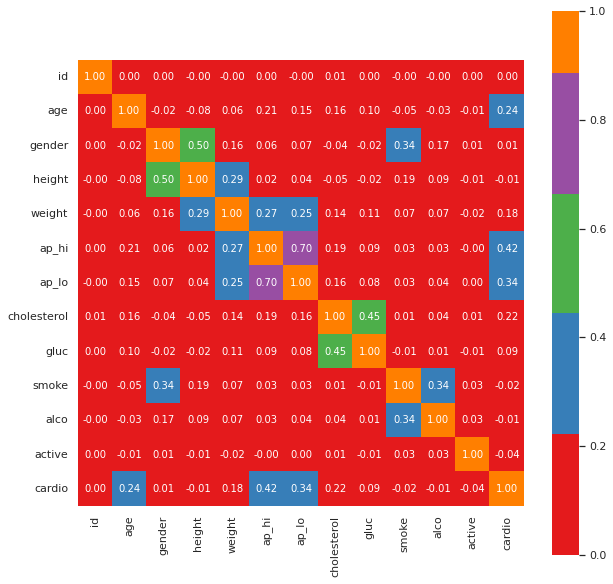

In [18]:
corrmat = cardio_vascular_data.corr()

plt.figure(figsize=(10,10))
sns.set()
hm = sns.heatmap(corrmat,cmap = 'Set1', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 10},
             yticklabels = cardio_vascular_data.columns, xticklabels = cardio_vascular_data.columns)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43ef74cd10>,
      dtype=object)

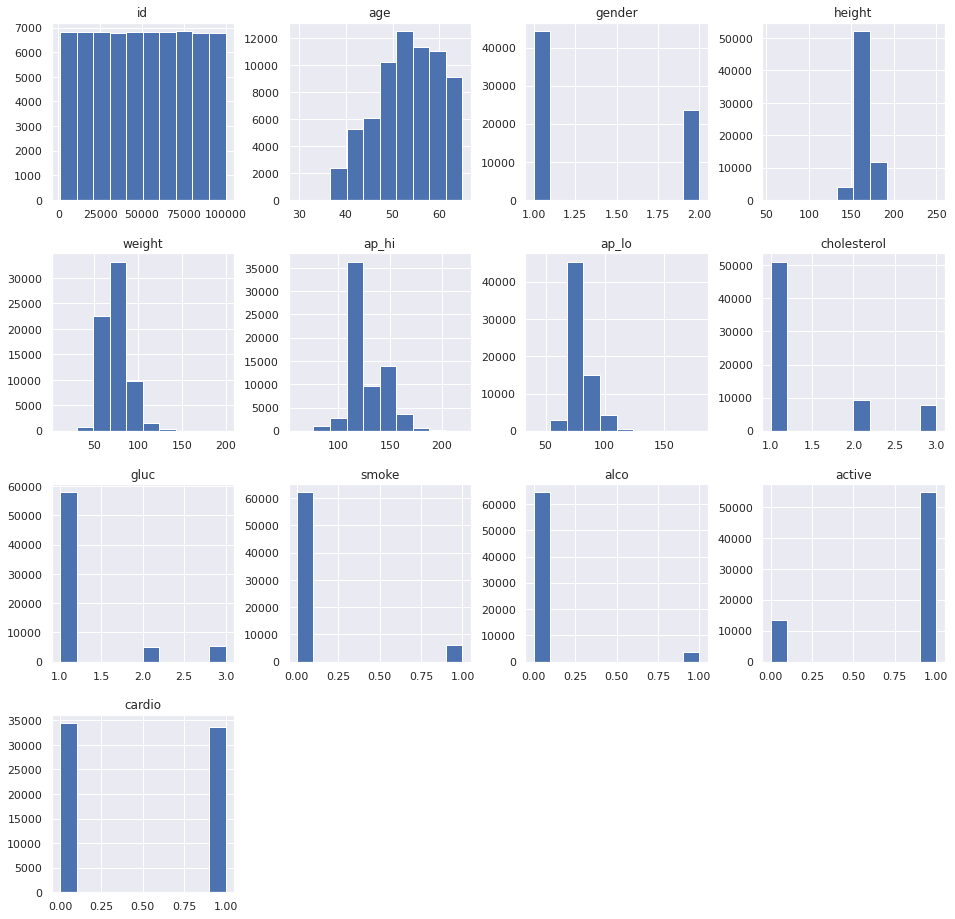

In [19]:
cardio_vascular_data.hist(figsize=(16,16))

In [21]:
#Dropping attribute "id" as it is not important for classifying the CVD 
#and setting X(input features) and y(target variable) for using the classification model on the data.
X = cardio_vascular_data.drop(['cardio', 'id'], axis=1)
y = cardio_vascular_data['cardio']

In [22]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,61.516769,1,155,69.0,130,80,2,2,0,0,1
1,40.104038,1,163,71.0,110,70,1,1,0,0,1
2,59.961670,1,165,70.0,120,80,1,1,0,0,1
3,39.832991,2,165,85.0,120,80,1,1,1,1,1
4,64.046543,1,155,62.0,120,80,1,1,0,0,1


In [23]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: cardio, dtype: int64

# Splitting the dataset into training and testing dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .66, random_state=0)

# Applying Machine Learning Model to the Processed Data 

# 1. Random Forest Classifier 

In [26]:
#Random Forest Classifier model for different number of Decision Trees.

lst_acc_train_rfc = []
lst_y_pred_train_rfc = []
lst_acc_test_rfc = []
lst_y_pred_test_rfc = []
cnt = 0

no_of_decision_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

for i in no_of_decision_trees:
  random_forest_model = RandomForestClassifier(n_estimators=i, max_depth=8, random_state=0)
  random_forest_model.fit(X_train, y_train)
  lst_y_pred_train_rfc.append(random_forest_model.predict(X_train))
  lst_y_pred_test_rfc.append(random_forest_model.predict(X_test))

  lst_acc_train_rfc.append(accuracy_score(y_train, lst_y_pred_train_rfc[cnt]))
  lst_acc_test_rfc.append(accuracy_score(y_test, lst_y_pred_test_rfc[cnt]))

  cnt += 1

In [27]:
#Printing Training and Testing Accuracies for different number of decision trees.

for i in range(0,20):
  print("\nTraining and Testing Accuracy for ", no_of_decision_trees[i]," Decision Trees: ")
  print("Training Accuracy: ", lst_acc_train_rfc[i])
  print("Testing Accuracy: ", lst_acc_test_rfc[i])


Training and Testing Accuracy for  10  Decision Trees: 
Training Accuracy:  0.7410861339862007
Testing Accuracy:  0.7304618309068129

Training and Testing Accuracy for  20  Decision Trees: 
Training Accuracy:  0.7413977298019141
Testing Accuracy:  0.7321899166198643

Training and Testing Accuracy for  30  Decision Trees: 
Training Accuracy:  0.7414645003338527
Testing Accuracy:  0.7321899166198643

Training and Testing Accuracy for  40  Decision Trees: 
Training Accuracy:  0.7411306476741598
Testing Accuracy:  0.7314122780489912

Training and Testing Accuracy for  50  Decision Trees: 
Training Accuracy:  0.7417538393055865
Testing Accuracy:  0.7322331187626906

Training and Testing Accuracy for  60  Decision Trees: 
Training Accuracy:  0.7419986645893613
Testing Accuracy:  0.7323195230483432

Training and Testing Accuracy for  70  Decision Trees: 
Training Accuracy:  0.7422212330291564
Testing Accuracy:  0.7319307037629066

Training and Testing Accuracy for  80  Decision Trees: 
Train

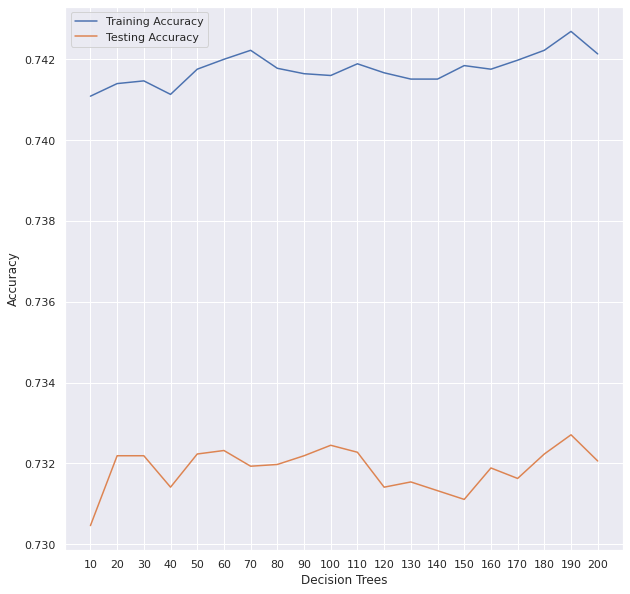

In [28]:
labels = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],labels)
plt.xlabel("Decision Trees")
plt.ylabel("Accuracy")
plt.plot(lst_acc_train_rfc,label='Training Accuracy')
plt.plot(lst_acc_test_rfc,label='Testing Accuracy')
plt.legend()

In [48]:
#Printing Testing and Training Accuracy and Confusion Matrix for the best number of decision trees.
#i.e. For the number of decision trees that has highest testing accuracy in Random Forest Classifier.

max_test_accuracy = max(lst_acc_test_rfc)
index = lst_acc_test_rfc.index(max_test_accuracy)

cf_train_rfc = confusion_matrix(y_train,lst_y_pred_train_rfc[index])
cf_test_rfc = confusion_matrix(y_test, lst_y_pred_test_rfc[index])

precision_test_rfc = precision_score(y_test,lst_y_pred_test_rfc[index])

recall_test_rfc = recall_score(y_test,lst_y_pred_test_rfc[index])

f_measure_test_rfc = f1_score(y_test,lst_y_pred_test_rfc[index])

print("\nMaximum Testing Accuracy found for ", no_of_decision_trees[index], "Decision Trees.")

print("\nConfusion Matrix for the Training Dataset")
print(cf_train_rfc)
print("\n\nConfusion Matrix for the Testing Dataset")
print(cf_test_rfc)

acc_train_rfc = lst_acc_train_rfc[index]
print("\nTraining Accuracy : ", acc_train_rfc)
acc_test_rfc = lst_acc_test_rfc[index]
print("Testing Accuracy : ", acc_test_rfc)

print("\nPrecision for random forest testing: ",precision_test_rfc)
print("\nRecall for random forest testing: ",recall_test_rfc)
print("\nF-1 Score for random forest testing",f_measure_test_rfc)


Maximum Testing Accuracy found for  190 Decision Trees.

Confusion Matrix for the Training Dataset
[[12986  9746]
 [12737  9461]]


Confusion Matrix for the Testing Dataset
[[6660 5002]
 [6529 4956]]

Training Accuracy :  0.7426886267527265
Testing Accuracy :  0.7327083423337798

Precision for random forest testing:  0.4976902992568789

Recall for random forest testing:  0.4315193730953418

F-1 Score for random forest testing 0.4622487525066455


# 2. Logistic Regression

In [68]:
logreg = LogisticRegression(solver="saga", random_state=0)
logreg.fit(X_train, y_train)

y_pred_train_lgr = pd.Series(logreg.predict(X_train))
y_pred_test_lgr = pd.Series(logreg.predict(X_test))

cf_train_lgr = confusion_matrix(y_train, y_pred_train_lgr)
cf_test_lgr = confusion_matrix(y_test, y_pred_test_lgr)

precision_test_lgr = precision_score(y_test,y_pred_test_lgr)

recall_test_lgr = recall_score(y_test,y_pred_test_lgr)

f_measure_test_lgr = f1_score(y_test,y_pred_test_lgr)

print("\nConfusion Matrix for the Training Dataset")
print(cf_train_rfc)
print("\nConfusion Matrix for the Testing Dataset")
print(cf_test_lgr)

acc_train_lgr = accuracy_score(y_train, y_pred_train_lgr)
print("\nTraining Accuracy: ", acc_train_lgr)
acc_test_lgr = accuracy_score(y_test, y_pred_test_lgr)
print("\nTesting Accuracy: ", acc_test_lgr)

print("\nPrecision for logestic regression testing: ",precision_test_lgr)
print("\nRecall for logestic regression testing: ",recall_test_lgr)
print("\nF-1 Score for logestic regression testing",f_measure_test_lgr)


Confusion Matrix for the Training Dataset
[[12986  9746]
 [12737  9461]]

Confusion Matrix for the Testing Dataset
[[8968 2694]
 [3899 7586]]

Training Accuracy:  0.7133318495437347

Testing Accuracy:  0.7151682723463084

Precision for logestic regression testing:  0.7379377431906615

Recall for logestic regression testing:  0.6605137135393992

F-1 Score for logestic regression testing 0.6970824718584884


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


# 3. K Nearest Neighbours

In [53]:
#Using kNN for classification for different values of k

k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
lst_y_pred_train_knn = []
lst_y_pred_test_knn = []
lst_acc_train_knn = []
lst_acc_test_knn = []
cnt = 0

for i in k:
  knn_classifier = KNeighborsClassifier(n_neighbors = i)
  knn_classifier.fit(X_train, y_train)

  lst_y_pred_train_knn.append(knn_classifier.predict(X_train))
  lst_y_pred_test_knn.append(knn_classifier.predict(X_test))

  lst_acc_train_knn.append(accuracy_score(y_train, lst_y_pred_train_knn[cnt]))
  lst_acc_test_knn.append(accuracy_score(y_test, lst_y_pred_test_knn[cnt]))
  
  cnt += 1

In [54]:
#Printing Testing and Training Accuracies for different values of k.

for i in k:
  print("\nTraining and Testing Accuracy for k =", i)
  print("Training Accuracy: ", lst_acc_train_knn[i-2])
  print("Testing Accuracy: ", lst_acc_test_knn[i-2])


Training and Testing Accuracy for k = 2
Training Accuracy:  0.8142221233029157
Testing Accuracy:  0.6342938609755043

Training and Testing Accuracy for k = 3
Training Accuracy:  0.81542399287781
Testing Accuracy:  0.6712316930919774

Training and Testing Accuracy for k = 4
Training Accuracy:  0.7767193411974183
Testing Accuracy:  0.6726141616624185

Training and Testing Accuracy for k = 5
Training Accuracy:  0.7817939016247496
Testing Accuracy:  0.6839331230829049

Training and Testing Accuracy for k = 6
Training Accuracy:  0.7641887380369463
Testing Accuracy:  0.6884693480796648

Training and Testing Accuracy for k = 7
Training Accuracy:  0.7678611172935678
Testing Accuracy:  0.696418542359701

Training and Testing Accuracy for k = 8
Training Accuracy:  0.7550634320053417
Testing Accuracy:  0.7005227459281981

Training and Testing Accuracy for k = 9
Training Accuracy:  0.755419541509014
Testing Accuracy:  0.7017756080701603

Training and Testing Accuracy for k = 10
Training Accuracy:

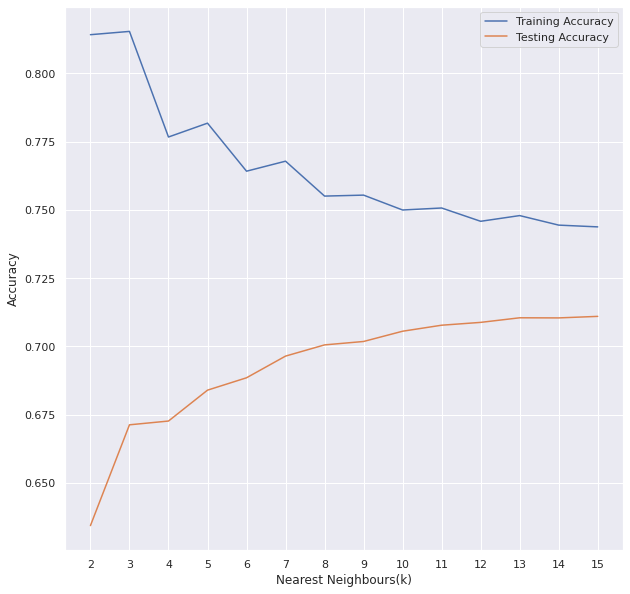

In [55]:
#Plotting Testing and Training Accuracies for different values of k.

labels = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels)
plt.xlabel("Nearest Neighbours(k)")
plt.ylabel("Accuracy")
plt.plot(lst_acc_train_knn,label='Training Accuracy')
plt.plot(lst_acc_test_knn,label='Testing Accuracy')
plt.legend()

In [56]:
#Printing Testing and Training Accuracy and Confusion Matrix for the best value of k.
#i.e. For the value of k that has highest testing accuracy in kNN.

max_test_accuracy = max(lst_acc_test_knn)
index = lst_acc_test_knn.index(max_test_accuracy)

cf_train_knn = confusion_matrix(y_train, lst_y_pred_train_knn[index])
cf_test_knn = confusion_matrix(y_test, lst_y_pred_test_knn[index])

precision_test_knn = precision_score(y_test,lst_y_pred_test_knn[index])

recall_test_knn = recall_score(y_test,lst_y_pred_test_knn[index])

f_measure_test_knn = f1_score(y_test,lst_y_pred_test_knn[index])

print("Maximum Testing Accuracy found for value of k =", k[index])

print("\nConfusion Matrix for the Training Dataset")
print(cf_train_knn)
print("\nConfusion Matrix for the Testing Dataset")
print(cf_test_knn)

acc_train_knn = lst_acc_train_knn[index]
print("\nTraining Accuracy: ", acc_train_knn)
acc_test_knn = lst_acc_test_knn[index]
print("Testing Accuracy: ", acc_test_knn)

print("\nPrecision for knn testing: ",precision_test_knn)
print("\nRecall for knn testing: ",recall_test_knn)
print("\nF-1 Score for knn testing",f_measure_test_knn)

Maximum Testing Accuracy found for value of k = 15

Confusion Matrix for the Training Dataset
[[17838  4894]
 [ 6618 15580]]

Confusion Matrix for the Testing Dataset
[[8846 2816]
 [3874 7611]]

Training Accuracy:  0.7437792121077231
Testing Accuracy:  0.7109776644921588

Precision for knn testing:  0.7299319075477126

Recall for knn testing:  0.6626904658249891

F-1 Score for knn testing 0.6946878422782037


# 4. Support Vector Classifier (LinearSVC)

In [51]:
support_vector_classifier = svm.LinearSVC(dual=False, random_state=0) 
support_vector_classifier.fit(X_train,y_train)

y_pred_train_svc = support_vector_classifier.predict(X_train) 
y_pred_test_svc = support_vector_classifier.predict(X_test)

cf_train_svc = confusion_matrix(y_train, y_pred_train_svc)
cf_test_svc = confusion_matrix(y_test, y_pred_test_svc)

precision_test_svc = precision_score(y_test,y_pred_test_svc)

recall_test_svc = recall_score(y_test,y_pred_test_svc)

f_measure_test_svc = f1_score(y_test,y_pred_test_svc)

print("\nConfusion Matrix for the Training Dataset") 
print(cf_train_svc) 
print("\nConfusion Matrix for the Testing Dataset") 
print(cf_test_svc)

acc_train_svc = accuracy_score(y_train, y_pred_train_svc) 
print("\nTraining Accuracy: ", acc_train_svc) 
acc_test_svc = accuracy_score(y_test, y_pred_test_svc) 
print("\nTesting Accuracy: ", acc_test_svc)

print("\nPrecision for svc testing: ",precision_test_svc)
print("\nRecall for svc testing: ",recall_test_svc)
print("\nF-1 Score for svc testing",f_measure_test_svc)


Confusion Matrix for the Training Dataset
[[18006  4726]
 [ 7591 14607]]

Confusion Matrix for the Testing Dataset
[[9279 2383]
 [3970 7515]]

Training Accuracy:  0.7258624527042066

Testing Accuracy:  0.7255367866246166

Precision for svc testing:  0.7592442917761164

Recall for svc testing:  0.6543317370483239

F-1 Score for svc testing 0.7028948229902259


# 5. XG-Boost Classifier (eXtreme Gradient Boosting)

In [52]:
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
xgb_classifier.fit(X_train,y_train)

y_pred_train_xgb = xgb_classifier.predict(X_train) 
y_pred_test_xgb = xgb_classifier.predict(X_test)

cf_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)
cf_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

precision_test_xgb = precision_score(y_test,y_pred_test_xgb)

recall_test_xgb = recall_score(y_test,y_pred_test_xgb)

f_measure_test_xgb = f1_score(y_test,y_pred_test_xgb)

print("\nConfusion Matrix for the Training Dataset") 
print(cf_train_xgb) 
print("\nConfusion Matrix for the Testing Dataset") 
print(cf_test_xgb)

acc_train_xgb = accuracy_score(y_train, y_pred_train_xgb) 
print("\nTraining Accuracy: ", acc_train_xgb) 
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb) 
print("\nTesting Accuracy: ", acc_test_xgb)

print("\nPrecision for xgb testing: ",precision_test_xgb)
print("\nRecall for xgb testing: ",recall_test_xgb)
print("\nF-1 Score for xgb testing",f_measure_test_xgb)


Confusion Matrix for the Training Dataset
[[17771  4961]
 [ 6841 15357]]

Confusion Matrix for the Testing Dataset
[[9142 2520]
 [3598 7887]]

Training Accuracy:  0.7373247273536613

Testing Accuracy:  0.7356892901887934

Precision for xgb testing:  0.7578552897088499

Recall for xgb testing:  0.6867218110579016

F-1 Score for xgb testing 0.7205371825324318


#  6. Decision Tree Classifier

In [59]:
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=0)
decision_tree_classifier.fit(X_train, y_train)

y_pred_train_dtc = decision_tree_classifier.predict(X_train)
y_pred_test_dtc = decision_tree_classifier.predict(X_test)

cf_train_dtc = confusion_matrix(y_train, y_pred_train_dtc)
cf_test_dtc = confusion_matrix(y_test, y_pred_test_dtc)

precision_test_dtc = precision_score(y_test,y_pred_test_dtc)

recall_test_dtc = recall_score(y_test,y_pred_test_dtc)

f_measure_test_dtc = f1_score(y_test,y_pred_test_dtc)

print("\nConfusion Matrix for the Training Dataset") 
print(cf_train_dtc) 
print("\nConfusion Matrix for the Testing Dataset") 
print(cf_test_dtc)

acc_train_dtc = accuracy_score(y_train, y_pred_train_dtc) 
print("\nTraining Accuracy: ", acc_train_dtc) 
acc_test_dtc = accuracy_score(y_test, y_pred_test_dtc) 
print("\nTesting Accuracy: ", acc_test_dtc)

print("\nPrecision for decision tree testing: ",precision_test_dtc)
print("\nRecall for decision tree testing: ",recall_test_dtc)
print("\nF-1 Score for decision tree testing",f_measure_test_dtc)


Confusion Matrix for the Training Dataset
[[17784  4948]
 [ 6772 15426]]

Confusion Matrix for the Testing Dataset
[[9006 2656]
 [3657 7828]]

Training Accuracy:  0.7391497885599821

Testing Accuracy:  0.7272648723376679

Precision for decision tree testing:  0.7466615795497902

Recall for decision tree testing:  0.6815846756639095

F-1 Score for decision tree testing 0.7126405389412354


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

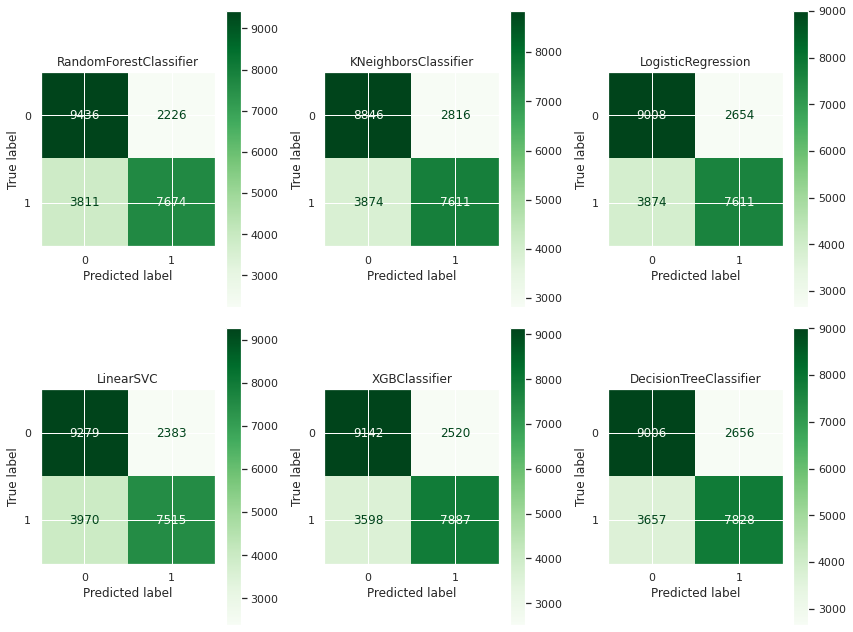

In [60]:
classifiers = [random_forest_model, knn_classifier, logreg, support_vector_classifier, xgb_classifier, decision_tree_classifier]
fig1, axes1 = plt.subplots(nrows=2, ncols=3, figsize=(12,9))

for clf, axis in zip(classifiers, axes1.flatten()):
    plot_confusion_matrix(clf, 
                          X_test, 
                          y_test, 
                          ax=axis, 
                          cmap='Greens',
                         display_labels=cardio_vascular_data.cardio)
    axis.title.set_text(type(clf).__name__)
plt.tight_layout()  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

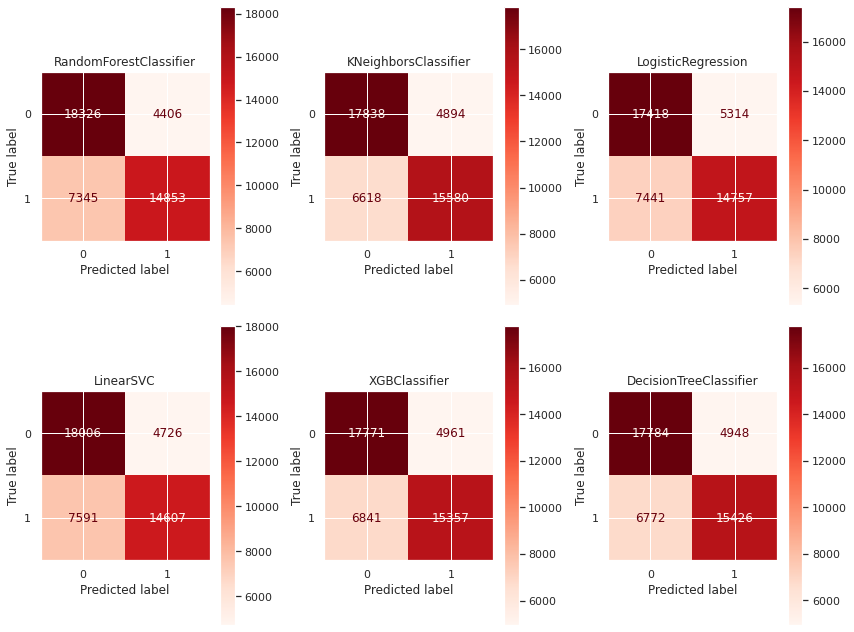

In [61]:
fig2, axes2 = plt.subplots(nrows=2, ncols=3, figsize=(12,9))

for clf, axis in zip(classifiers, axes2.flatten()):
    plot_confusion_matrix(clf, 
                          X_train, 
                          y_train, 
                          ax=axis, 
                          cmap='Reds',
                         display_labels=cardio_vascular_data.cardio)
    axis.title.set_text(type(clf).__name__)
plt.tight_layout()  
plt.show()

In [64]:
cross_validation_scores = []
for clf in classifiers:
    cross_validation_scores.append(cross_val_score(clf,X,y, cv=3))
    print("The Cross Validation Score for ",type(clf).__name__, " : ",cross_val_score(clf,X,y, cv=3))
    axis.title.set_text(type(clf).__name__)
plt.tight_layout()  
plt.show()

The Cross Validation Score for  RandomForestClassifier  :  [0.73247257 0.73320994 0.73135907]
The Cross Validation Score for  KNeighborsClassifier  :  [0.71184947 0.71091133 0.71002997]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

The Cross Validation Score for  LogisticRegression  :  [0.71559512 0.71985722 0.71523004]
The Cross Validation Score for  LinearSVC  :  [0.72432027 0.72677596 0.7254539 ]
The Cross Validation Score for  XGBClassifier  :  [0.73300137 0.73351842 0.73519302]
The Cross Validation Score for  DecisionTreeClassifier  :  [0.72850659 0.7295082  0.72479288]


<Figure size 720x720 with 0 Axes>

In [65]:
cross_validation_scores

[array([0.73247257, 0.73320994, 0.73135907]),
 array([0.71184947, 0.71091133, 0.71002997]),
 array([0.71559512, 0.71985722, 0.71523004]),
 array([0.72432027, 0.72677596, 0.7254539 ]),
 array([0.73300137, 0.73351842, 0.73519302]),
 array([0.72850659, 0.7295082 , 0.72479288])]

In [69]:
evaluation = {'Model No.': [1,2,3,4,5,6],
              'Classifier': classifiers,
              'Training Accuracy': [acc_train_rfc,acc_train_lgr,acc_train_knn,acc_train_svc,acc_train_xgb,acc_train_dtc],
              'Testing Accuracy': [acc_test_rfc,acc_test_lgr,acc_test_knn,acc_test_svc,acc_test_xgb,acc_test_dtc],
              'Precision': [precision_test_rfc,precision_test_lgr,precision_test_knn,precision_test_svc,precision_test_xgb,precision_test_dtc],
              'Recall': [recall_test_rfc,recall_test_lgr,recall_test_knn,recall_test_svc,recall_test_xgb,recall_test_dtc],
              'F1-Score': [f_measure_test_rfc,f_measure_test_lgr,f_measure_test_knn,f_measure_test_svc,f_measure_test_xgb,f_measure_test_dtc],
              'Cross Validation Score': [max(x) for x in cross_validation_scores]
              } 

In [70]:
eval_df = pd.DataFrame(data=evaluation)

In [73]:
eval_df

,Model No.,Classifier,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score,Cross Validation Score
0,1,"(DecisionTreeClassifier(max_depth=8, max_featu...",0.742689,0.732708,0.497690,0.431519,0.462249,0.733210
1,2,KNeighborsClassifier(n_neighbors=15),0.713332,0.715168,0.737938,0.660514,0.697082,0.711849
2,3,"LogisticRegression(max_iter=500, random_state=...",0.743779,0.710978,0.729932,0.662690,0.694688,0.719857
3,4,"LinearSVC(dual=False, random_state=0)",0.725862,0.725537,0.759244,0.654332,0.702895,0.726776
4,5,"XGBClassifier(eval_metric='mlogloss', use_labe...",0.737325,0.735689,0.757855,0.686722,0.720537,0.735193
5,6,"DecisionTreeClassifier(criterion='entropy', ma...",0.739150,0.727265,0.746662,0.681585,0.712641,0.729508
